In [18]:
import pandas as pd
from extended_k_mean import kmeans_sk, kmeans_own, scatter_plot_cluster_2d
from matplotlib import style
from sklearn.datasets import make_blobs
style.use('ggplot')

## Analyzing Sample Data from sklearn

In [19]:
X, cluster_assignments = make_blobs(n_samples=200, centers=4, cluster_std=0.60, random_state=0)

In [20]:
kmeans_sk_test = kmeans_sk(k=4, max_iterations=100)
%time labels_sampleData_sk, centroids_sampleData_sk =kmeans_sk_test.fit(X)

CPU times: user 231 ms, sys: 31.5 ms, total: 262 ms
Wall time: 21.4 ms


In [21]:
kmeans_own_test = kmeans_own(k=4)
%time labels_sampleData, centroids_sampleData = kmeans_own_test.fit(X)

225.51501526440694
54.232744084078035
6.9979207416553315
CPU times: user 456 ms, sys: 97.5 ms, total: 554 ms
Wall time: 40 ms


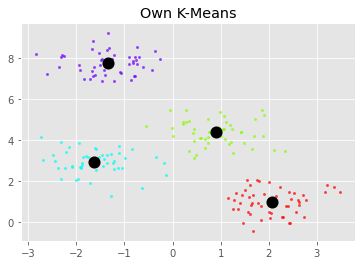

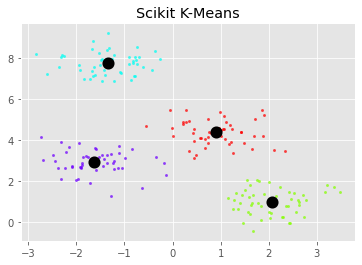

In [22]:
scatter_plot_cluster_2d(labels_sampleData, centroids_sampleData, X, 'Own K-Means')
scatter_plot_cluster_2d(labels_sampleData_sk, centroids_sampleData_sk, X, 'Scikit K-Means')

## Analyzing Homework data

In [23]:
data = pd.read_csv('historical-weather.csv')
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,100,2011-09-10 01:40:49,911.8,62.96,95.0,2.3,106.0,2.5,88.0,1.9,0.0,0.0,63.9
2,200,2011-09-10 03:20:49,911.4,68.00,53.0,0.3,69.0,0.5,19.0,0.2,0.0,0.0,33.4
3,300,2011-09-10 05:00:49,911.4,64.22,191.0,2.8,197.0,2.9,185.0,2.6,0.0,0.0,58.2
4,400,2011-09-10 06:40:49,912.2,52.70,181.0,1.5,191.0,2.0,164.0,1.2,0.0,0.0,89.8


In [24]:
data_short = data.loc[:, ['relative_humidity', 'air_temp']]
data_short.head(2)

,relative_humidity,air_temp
0,60.5,64.76
1,63.9,62.96


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15873 entries, 0 to 15872
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rowID               15873 non-null  int64  
 1   hpwren_timestamp    15873 non-null  object 
 2   air_pressure        15873 non-null  float64
 3   air_temp            15873 non-null  float64
 4   avg_wind_direction  15870 non-null  float64
 5   avg_wind_speed      15870 non-null  float64
 6   max_wind_direction  15870 non-null  float64
 7   max_wind_speed      15870 non-null  float64
 8   min_wind_direction  15870 non-null  float64
 9   min_wind_speed      15870 non-null  float64
 10  rain_accumulation   15872 non-null  float64
 11  rain_duration       15872 non-null  float64
 12  relative_humidity   15873 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.6+ MB


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled  = scaler.fit_transform(data_short)

In [27]:
from sklearn.cluster import KMeans
inertia = pd.DataFrame(data = [], index=range(2, 21), columns=['inertia'])

for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters = n_clusters)
    kmeans.fit(x_scaled)
    inertia.loc[n_clusters] = kmeans.inertia_

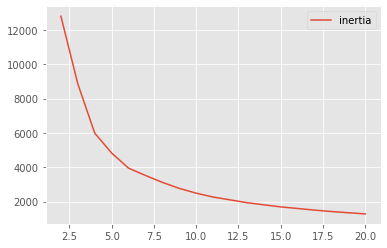

In [28]:
import matplotlib.pyplot as plt

inertia.plot(kind='line', y='inertia')
plt.show()

## Analyzing KMeans from sklearn

In [29]:
kmeans_sk_test = kmeans_sk(k=5, max_iterations=100)
%time labels_sk, centroids_sk =kmeans_sk_test.fit(x_scaled)

CPU times: user 1.87 s, sys: 1.61 s, total: 3.48 s
Wall time: 246 ms


## Analyzing own KMeans implementation

In [30]:
kmeans_own_test = kmeans_own(k=5, max_iterations=200)
%time labels, centroids = kmeans_own_test.fit(x_scaled)

62.676586289019006
40.97665215714309
57.804033787312065
48.28760245145684
14.384721765298465
44.52568894149323
26.033268100999884
15.660067681809648
2.0834519191646828
8.58991920523607
7.297347280308239
5.186504906670917
3.495678273475549
5.198184003951876
6.082123233143424
2.09517244593643
4.304976469322724
4.948535467426817
0.9892329798500683
2.9947848648905504
5.370115192782435
0.41157281024809006
2.8665214073232765
3.78695028309859
0.22290068449068054
3.2081114619984508
2.9511285851799633
2.627316928912454
0.10342180811727351
3.159873521185892
2.603728199532937
1.3740866469246638
0.1212107074817951
5.886182566607116
2.0253297771813106
1.1704563603442057
0.10506206330893653
4.06563678122956
1.687939263021935
1.2530575478516186
2.5980238928521304
1.4805302825236388
1.136141910285393
0.0813011336715932
2.476164239994133
1.3746055051411197
1.153444827197302
0.07406635336343542
2.304217095409265
0.8864328721988088
0.7761809784177611
0.03122063365641862
0.892771443853802
0.37187252867739

## Analyzing Balanced Kmeans implementation

In [31]:
kmeans_own_test_balanced = kmeans_own(k=5, max_iterations=200, balanced=True)
%time labels_balanced, centroids_balanced = kmeans_own_test_balanced.fit(x_scaled)

16.959478068654093
15.942974770936333
657.1673717999179
76.19545814410759
3884.958663282381
36.27060581719342
10.868768192142774
27.981222176947618
1.9583338013660554
0.8845246998523091
0.5452478904470601
9.40876554666963
0.3023380226702066
0.6988651884240376
0.03794061248969277
3.008563321014286
0.2273080684710973
3.0943805035629612
0.05312417120350907
0.09144083981044729
0.24580575418907757
0.01921381238283413
0.026530584314664197
0.09414427673283089
0.1914309019883601
0.025651361177130346
0.3136836787118773
0.05866314405041331
0.006133903314797046
0.3507112909010601
0.08884762963884849
CPU times: user 7.84 s, sys: 1.12 s, total: 8.96 s
Wall time: 8.08 s


## Plotting clusters

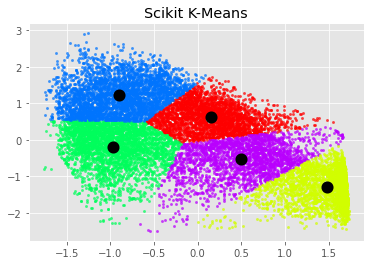

In [32]:
scatter_plot_cluster_2d(labels_sk, centroids_sk, x_scaled, 'Scikit K-Means')

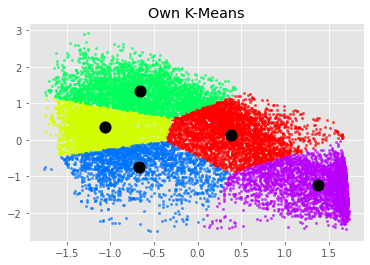

In [33]:
scatter_plot_cluster_2d(labels, centroids, x_scaled, 'Own K-Means')

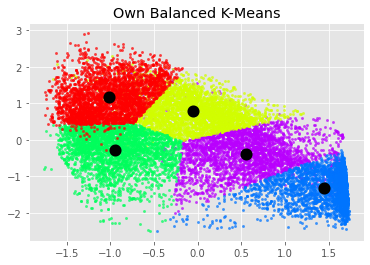

In [34]:
scatter_plot_cluster_2d(labels_balanced, centroids_balanced, x_scaled, 'Own Balanced K-Means')